In [76]:
!pip install tensorflow-gpu


In [119]:
import tensorflow as tf

In [120]:
print(tf.__version__)

2.9.1


In [121]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
# Importing the dataset
dataset = pd.read_csv('C:\TD\Sem 2\Personal projects\ANN- Churning\Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [123]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [124]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [125]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [126]:
# Part 2 - Now let's make the ANN!

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [128]:
# Initialising the ANN
classifier = Sequential()

In [129]:
# Adding the input layer and the ip layer
classifier.add(Dense(units=11,activation='relu'))

In [130]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [131]:
# Adding the input layer and the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [132]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [133]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [135]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 6s 7ms/step - loss: 0.5014 - accuracy: 0.7888 - val_loss: 0.4550 - val_accuracy: 0.7967
Epoch 2/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4349 - accuracy: 0.8099 - val_loss: 0.4356 - val_accuracy: 0.8111
Epoch 3/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4172 - accuracy: 0.8201 - val_loss: 0.4242 - val_accuracy: 0.8190
Epoch 4/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4034 - accuracy: 0.8300 - val_loss: 0.4129 - val_accuracy: 0.8258
Epoch 5/50
536/536 [==============================] - 3s 6ms/step - loss: 0.3895 - accuracy: 0.8412 - val_loss: 0.3992 - val_accuracy: 0.8319
Epoch 6/50
536/536 [==============================] - 3s 6ms/step - loss: 0.3745 - accuracy: 0.8470 - val_loss: 0.3881 - val_accuracy: 0.8364
Epoch 7/50
536/536 [==============================] - 4s 7ms/step - loss: 0.3629 - accuracy: 0.8520 - val_loss: 0.3802 - val_accuracy: 0.8421
Epoch 

In [139]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


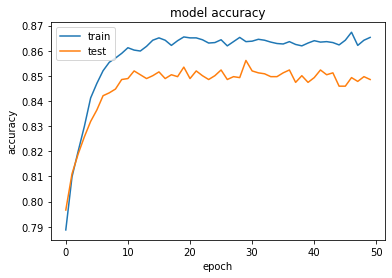

In [140]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

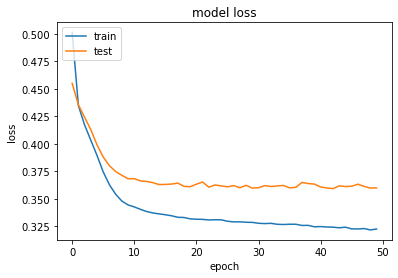

In [141]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [142]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [143]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1506,   89],
       [ 200,  205]], dtype=int64)

In [144]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [145]:
score

0.8555

In [146]:
classifier.get_weights()

[array([[ 0.18724811, -0.15816675,  0.408442  , -0.06326337, -0.02943089,
          0.1636013 ,  0.02698375,  0.02732697,  0.23436877, -0.08798909,
          0.0502544 ],
        [-0.79693055,  0.7042001 ,  0.06164136, -1.1425735 , -1.0062648 ,
         -0.79716533,  0.48055124,  0.10285692,  0.5985047 , -0.16571426,
          0.5272659 ],
        [-0.15246488,  0.03204144, -0.77534753,  0.47171098, -0.18992329,
         -0.04469397, -0.14549395, -0.02569569,  0.21282877, -0.30479994,
         -0.04098678],
        [ 0.00566938, -0.15743229,  0.07847911,  0.35752806,  0.0870828 ,
         -0.0594529 ,  0.47734952, -0.34525296, -0.65185064,  1.0365143 ,
         -0.11775881],
        [-0.32834694, -0.06902205, -0.6560333 ,  0.0993849 ,  0.13234404,
         -0.27660304,  1.3147821 , -1.2347711 ,  0.27415082, -0.3198847 ,
         -0.14309634],
        [ 0.76310295,  0.09412502, -0.25559476, -0.02233818, -0.580896  ,
          0.0306883 ,  0.06942496,  0.09586983, -0.14414419,  0.2036725